# FFF Workshop

## A6: Uploading to Fragalysis

### Outline

- Export Poses as Fragalysis compatible SD files (SDFs)
- Upload SDFs to the Fragalysis RHS
- Upload interactive Plotly Figures to the RHS

## Export Poses as Fragalysis compatible SD files

In [10]:
# setup the animal
import hippo
animal = hippo.HIPPO(
    "A71EV2A_demo",
    "../data/A71EV2A.sqlite",
)

 Creating HIPPO animal

name = A71EV2A_demo

db_path = ../data/A71EV2A.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = ../data/A71EV2A.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ ../data/A71EV2A.sqlite!

 Success  Initialised animal HIPPO("A71EV2A_demo")!

In [2]:
all_merges = animal.poses(tag="fragmenstein_merge")
all_merges

 ERROR  No entry in tag with tag_name='fragmenstein_merge'!

### Filter poses

Poses can be filtered by their Fragmenstein assigned *energy_score* (ddG) and *distance_score* (RMSD):

In [5]:
filtered_merges = (
    all_merges.filter(
        key="energy_score", 
        value="0", 
        operator="<",
    ).filter(
        key="distance_score", 
        value="2", 
        operator="<",
    )
)

filtered_merges

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│    1 filtered = (                                                                                │
│ ❱  2 │   all_merges.filter(                                                                      │
│    3 │   │   key="energy_score",                                                                 │
│    4 │   │   value="0",                                                                          │
│    5 │   │   operator="<",                                                                       │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │  all_merges = None                                                                           │ │
│ │      animal = HIPPO("A71EV2A_demo")                                                          │ │
│ │        exit = <IPython.core.autocall.ZMQExitAutocall object at 0x7f1c1489e0c0>               │ │
│ │ get_ipython = <bound method InteractiveShell.get_ipython of                                  │ │
│ │               <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f1c1489e180>>             │ │
│ │       hippo = <module 'hippo' from '/home/jovyan/HIPPO/hippo/__init__.py'>                   │ │
│ │          In = [                                                                              │ │
│ │               │   '',                                                                        │ │
│ │               │   "# setup the animal\nget_ipython().run_line_magic('load_ext',              │ │
│ │               'autoreload')\nget_ip"+154,                                                    │ │
│ │               │   'all_merges = animal.poses(tag="fragmenstein_merge")\nall_merges',         │ │
│ │               │   'filtered = all_merges.filter(key="energy_score", value="0",               │ │
│ │               operator="<")\n      '+69,                                                     │ │
│ │               │   'filtered = \n\nall_merges.filter(\n    key="energy_score", \n             │ │
│ │               value="0", \n    ope'+83,                                                      │ │
│ │               │   'filtered = (\n    all_merges.filter(\n        key="energy_score", \n      │ │
│ │               value="'+121                                                                   │ │
│ │               ]                                                                              │ │
│ │         Out = {}                                                                             │ │
│ │        quit = <IPython.core.autocall.ZMQExitAutocall object at 0x7f1c1489e0c0>               │ │
│ ╰──────────────────────────────────────────────────────────────────────────────────────────────╯ │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'filter'

## Upload SDF to Fragalysis RHS

## Upload Plotly Figure to RHS

Fragalysis now supports the upload of arbitrary interactive graphs to the RHS. This can be used to provide additional statistical or analytic insight or serve as an alternative way to navigate observations.

Some HIPPO graphs come pre-formatted to support Fragalysis out the box. In general, if a HIPPO graph has compound codes or observation names in it's x-axis it is likely to work.

First, create a figure object:

#poses = 700

#interactions = 67

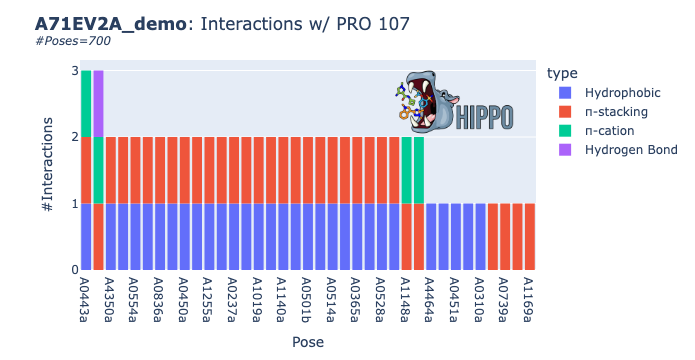

In [6]:
fig = animal.plot_residue_interactions(107)
fig

Make any formatting changes:

In [8]:
fig.update_layout(xaxis_title="Observation");

Send the upload request:

In [9]:
from os import environ
from fragalysis.requests import upload_graph
upload_graph(
    title="Interactions w/ PRO 107",
    figure=fig,
    stack="staging",
    token=environ["FRAGALYSIS_TOKEN"],
    target_name="A71EV2A",
    tas="lb32627-66",
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 │   title="Interactions w/ PRO 107",                                                        │
│    5 │   figure=fig,                                                                             │
│    6 │   stack="staging",                                                                        │
│ ❱  7 │   token=environ["FRAGALYSIS_TOKEN"],                                                      │
│    8 │   target_name="A71EV2A",                                                                  │
│    9 │   tas="lb32627-66",                                                                       │
│   10 )                                                                                           │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │  all_merges = None                                                                           │ │
│ │      animal = HIPPO("A71EV2A_demo")                                                          │ │
│ │     environ = environ({                                                                      │ │
│ │               │   'SHELL': '/bin/bash',                                                      │ │
│ │               │   'INSTANCE_5F759291_562D_4C26_B536_4288F412EE25_PORT_8888_TCP':             │ │
│ │               'tcp://10.43.107.241:8888',                                                    │ │
│ │               │   'KUBERNETES_SERVICE_PORT_HTTPS': '443',                                    │ │
│ │               │   'INSTANCE_D619CA0D_1B62_421E_A8CC_89F1D57A3B20_PORT_8888_TCP_PORT':        │ │
│ │               '8888',                                                                        │ │
│ │               │   'INSTANCE_D619CA0D_1B62_421E_A8CC_89F1D57A3B20_SERVICE_PORT_8888_TCP':     │ │
│ │               '8888',                                                                        │ │
│ │               │   'KUBERNETES_SERVICE_PORT': '443',                                          │ │
│ │               │   'INSTANCE_D619CA0D_1B62_421E_A8CC_89F1D57A3B20_PORT_8888_TCP':             │ │
│ │               'tcp://10.43.62.151:8888',                                                     │ │
│ │               │   'CONDA_EXE': '/opt/conda/bin/conda',                                       │ │
│ │               │   'HOSTNAME':                                                                │ │
│ │               'instance-5f759291-562d-4c26-b536-4288f412ee25-5cd5fc5984-2qx5b',              │ │
│ │               │   'LANGUAGE': 'C.UTF-8',                                                     │ │
│ │               │   ... +70                                                                    │ │
│ │               })                                                                             │ │
│ │        exit = <IPython.core.autocall.ZMQExitAutocall object at 0x7f1c1489e0c0>               │ │
│ │         fig = Figure({                                                                       │ │
│ │               │   'data': [{'bingroup': 'x',                                                 │ │
│ │               │   │   │     'customdata': array(['A4350a', 'A4464a', 'A4343a', 'A0554a',     │ │
│ │               'A0875a', 'A0487a', 'A0836a',                                                  │ │
│ │               │   │   │   │   │   │   │   │      'A0387a', 'A0450a', 'A0515a', 'A0451a',     │ │
│ │               'A0446a', 'A1255a', 'A0501a',                                                  │ │
│ │               │   │   │   │   │   │   │   │      'A0310a'

N.B. that if on-click events are to reference compounds, `identifier="compound_code"` should be added to the above function call